In [1]:
import pandas as pd 
import numpy as np

%matplotlib inline 
import matplotlib.pyplot as plt 

## Series

In [4]:
s = pd.Series(data=[1, 2, 3, 5, 6], index=[4, 3, 2, 'a', 0])
s

4    1
3    2
2    3
a    5
0    6
dtype: int64

In [6]:
s['a']
s.get('a', 'error')

5

In [7]:
s.get('b', 'error')

'error'

In [8]:
s + s[1:]

0    12.0
2     6.0
3     4.0
4     NaN
a    10.0
dtype: float64

#### to numpy

In [9]:
s.values

array([1, 2, 3, 5, 6])

## DataFrame

In [14]:
d = pd.DataFrame(np.round(np.random.rand(8, 3)*10).astype(int),
             index=pd.date_range('01/01/2021', periods=8), columns=['a', 'b', 'c'])
d

,a,b,c
2021-01-01,2,7,1
2021-01-02,5,3,0
2021-01-03,4,3,5
2021-01-04,5,9,8
2021-01-05,2,4,5
2021-01-06,2,8,1
2021-01-07,6,8,9
2021-01-08,6,10,5


### Saving data

In [16]:
d.to_csv('test.csv')

### Reading data

In [20]:
f = pd.read_csv('test.csv', index_col=0)

In [21]:
f.head(2) # top

,a,b,c
2021-01-01,2,7,1
2021-01-02,5,3,0


In [23]:
f.tail(2) # bottom

,a,b,c
2021-01-07,6,8,9
2021-01-08,6,10,5


In [24]:
f.sample(2) # random

,a,b,c
2021-01-06,2,8,1
2021-01-01,2,7,1


In [33]:
g = pd.DataFrame({'a': [1, 2, 2], 'b': [0, 0, 0], 'c': np.random.rand(3).round(2)})
g

,a,b,c
0,1,0,0.69
1,2,0,0.21
2,2,0,0.00


In [34]:
g.columns, g.index

(Index(['a', 'b', 'c'], dtype='object'), RangeIndex(start=0, stop=3, step=1))

In [36]:
g.sort_values(by=['a', 'c'])

,a,b,c
0,1,0,0.69
2,2,0,0.00
1,2,0,0.21


In [37]:
g.values

array([[1.  , 0.  , 0.69],
       [2.  , 0.  , 0.21],
       [2.  , 0.  , 0.  ]])

In [38]:
g.dtypes

a      int64
b      int64
c    float64
dtype: object

In [39]:
g.describe()

,a,b,c
count,3.000000,3.0,3.000000
mean,1.666667,0.0,0.300000
std,0.577350,0.0,0.353695
min,1.000000,0.0,0.000000
25%,1.500000,0.0,0.105000
50%,2.000000,0.0,0.210000
75%,2.000000,0.0,0.450000
max,2.000000,0.0,0.690000


In [42]:
g.rename(columns={'c': 'COLORS'}, inplace=True)
g

,a,b,COLORS
0,1,0,0.69
1,2,0,0.21
2,2,0,0.00


In [46]:
g['C2'] = [True] + [False]*2
g

,a,b,COLORS,C2
0,1,0,0.69,True
1,2,0,0.21,False
2,2,0,0.00,False


In [47]:
for name in g.columns:
    print(name, g[name].unique())

a [1 2]
b [0]
COLORS [0.69 0.21 0.  ]
C2 [ True False]


### Deleting

In [48]:
del g['C2']
g

,a,b,COLORS
0,1,0,0.69
1,2,0,0.21
2,2,0,0.00


In [50]:
g.drop(1, axis=0)

,a,b,COLORS
0,1,0,0.69
2,2,0,0.00


In [52]:
g.at[2, 'b'] = 1
g

,a,b,COLORS
0,1,0,0.69
1,2,0,0.21
2,2,1,0.00


In [56]:
g.loc[:, 'b':]

,b,COLORS
0,0,0.69
1,0,0.21
2,1,0.00


In [54]:
g.iloc[:, 1:]

,b,COLORS
0,0,0.69
1,0,0.21
2,1,0.00


In [62]:
g.reindex(index=[0, 1, 2, 3, 4], method='ffill')

,a,b,COLORS
0,1,0,0.69
1,2,0,0.21
2,2,1,0.00
3,2,1,0.00
4,2,1,0.00


In [64]:
for name in g: # columns 
    print(name, g[name].values)

a [1 2 2]
b [0 0 1]
COLORS [0.69 0.21 0.  ]


In [65]:
for index, row in g.iterrows(): # rows
    print(index, row.values)

0 [1.   0.   0.69]
1 [2.   0.   0.21]
2 [2. 1. 0.]


In [66]:
for t in g.itertuples(): # rows
    print(t)

Pandas(Index=0, a=1, b=0, COLORS=0.69)
Pandas(Index=1, a=2, b=0, COLORS=0.21)
Pandas(Index=2, a=2, b=1, COLORS=0.0)


In [67]:
g.a > g.b

0    True
1    True
2    True
dtype: bool

In [69]:
g

,a,b,COLORS
0,1,0,0.69
1,2,0,0.21
2,2,1,0.00


In [92]:
g.loc[3] = [5, 4, 8.00]
g

,a,b,COLORS
0,1.0,0,0.69
1,2.0,0,0.21
2,2.0,1,0.0
3,5.0,4,8.0


In [93]:
g.b = g.b / 0
g

,a,b,COLORS
0,1.0,NaN,0.69
1,2.0,NaN,0.21
2,2.0,inf,0.0
3,5.0,inf,8.0


In [94]:
g[~g.b.isnull()]

,a,b,COLORS
2,2.0,inf,0.0
3,5.0,inf,8.0


In [96]:
g.loc[4] = [10, 4, 8.60]
g

,a,b,COLORS
0,1.0,NaN,0.69
1,2.0,NaN,0.21
2,2.0,inf,0.0
3,5.0,inf,8.0
4,10.0,4.0,8.6


In [99]:
g.b.mean(), np.mean(g.b.values)

(inf, nan)

In [100]:
g.dropna()

,a,b,COLORS
2,2.0,inf,0.0
3,5.0,inf,8.0
4,10.0,4.0,8.6


In [106]:
g = g.fillna(value=0.5)
g

,a,b,COLORS
0,1.0,0.5,0.69
1,2.0,0.5,0.21
2,2.0,inf,0.00
3,5.0,inf,8.00
4,10.0,4.0,8.60


In [2]:
A = pd.DataFrame({'transaction': [1, 2, 3, 4, 5, 6], 'client': ['Mark', 'Ronald', 'Mark', 'Susan', 'Ronald', 'Susan']})
B = pd.DataFrame({'client': ['Mark', 'Susan', 'Ronald'], 'Age': [23, 18, 19]})

In [121]:
A

,transaction,client
0,1,Mark
1,2,Ronald
2,3,Mark
3,4,Susan
4,5,Ronald
5,6,Susan


In [122]:
B

,client,Age
0,Mark,23
1,Susan,18
2,Ronald,19


In [123]:
pd.merge(A, B, on='client')

,transaction,client,Age
0,1,Mark,23
1,3,Mark,23
2,2,Ronald,19
3,5,Ronald,19
4,4,Susan,18
5,6,Susan,18


In [133]:
H = A.merge(B, how='left', on='client')
H

,transaction,client,Age
0,1,Mark,23
1,2,Ronald,19
2,3,Mark,23
3,4,Susan,18
4,5,Ronald,19
5,6,Susan,18


In [126]:
B2 = pd.DataFrame({'client': ['Rudy', 'Peter', 'Angela'], 'Age': [27, 17, 18]})

In [128]:
B.append(B2, ignore_index=True)

,client,Age
0,Mark,23
1,Susan,18
2,Ronald,19
3,Rudy,27
4,Peter,17
5,Angela,18


In [129]:
pd.concat([B, B2], ignore_index=True)

,client,Age
0,Mark,23
1,Susan,18
2,Ronald,19
3,Rudy,27
4,Peter,17
5,Angela,18


In [130]:
pd.concat([B, B2], axis=1, ignore_index=True)

,0,1,2,3
0,Mark,23,Rudy,27
1,Susan,18,Peter,17
2,Ronald,19,Angela,18


In [137]:
H.columns = ['transaction', 'client', 'Amount']
H

,transaction,client,Amount
0,1,Mark,23
1,2,Ronald,19
2,3,Mark,23
3,4,Susan,18
4,5,Ronald,19
5,6,Susan,18


In [138]:
H.groupby('client')['Amount'].mean()

client
Mark      23.0
Ronald    19.0
Susan     18.0
Name: Amount, dtype: float64

In [140]:
H.groupby('client').groups

{'Mark': [0, 2], 'Ronald': [1, 4], 'Susan': [3, 5]}

In [146]:
H['max amount'] = H['client'].map(H.groupby('client')['Amount'].max())
H

,transaction,client,Amount,max amount
0,1,Mark,23,23
1,2,Ronald,19,19
2,3,Mark,23,23
3,4,Susan,18,18
4,5,Ronald,19,19
5,6,Susan,18,18


In [147]:
H.groupby('client').sum()

,transaction,Amount,max amount
client,,,
Mark,4,46,46
Ronald,7,38,38
Susan,10,36,36


In [148]:
H.groupby('client').aggregate(np.mean)

,transaction,Amount,max amount
client,,,
Mark,2.0,23.0,23.0
Ronald,3.5,19.0,19.0
Susan,5.0,18.0,18.0


In [155]:
H.groupby('client').aggregate([np.mean, np.max, np.min])

transaction           Amount           max amount          
              mean amax amin   mean amax amin       mean amax amin
client                                                            
Mark           2.0    3    1   23.0   23   23       23.0   23   23
Ronald         3.5    5    2   19.0   19   19       19.0   19   19
Susan          5.0    6    4   18.0   18   18       18.0   18   18

In [153]:
H

,transaction,client,Amount,max amount
0,1,Mark,23,23
1,2,Ronald,19,19
2,3,Mark,23,23
3,4,Susan,18,18
4,5,Ronald,19,19
5,6,Susan,18,18


In [160]:
H.groupby('client').agg({'Amount': np.mean})

,Amount
client,
Mark,23.0
Ronald,19.0
Susan,18.0


### Transform

In [3]:
A = pd.DataFrame({'Amount': [10, 20, 33, 48, 51, 62], 'client': ['Mark', 'Ronald', 'Mark', 'Susan', 'Ronald', 'Susan']})
A

,Amount,client
0,10,Mark
1,20,Ronald
2,33,Mark
3,48,Susan
4,51,Ronald
5,62,Susan


In [7]:
A['normalized'] = A.groupby('client')['Amount'].transform(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))
A

,Amount,client,normalized
0,10,Mark,0.0
1,20,Ronald,0.0
2,33,Mark,1.0
3,48,Susan,0.0
4,51,Ronald,1.0
5,62,Susan,1.0


### Filter 

In [9]:
A.groupby('client').filter(lambda x: x['Amount'].max() > 50)

,Amount,client,normalized
1,20,Ronald,0.0
3,48,Susan,0.0
4,51,Ronald,1.0
5,62,Susan,1.0


### Apply

In [10]:
def f(x):
    return ((x - np.min(x)) / (np.max(x) - np.min(x)))

A.groupby('client')['Amount'].apply(f)

0    0.0
1    0.0
2    1.0
3    0.0
4    1.0
5    1.0
Name: Amount, dtype: float64

In [12]:
B = pd.DataFrame(np.random.rand(5, 6)).round(2)
B

,0,1,2,3,4,5
0,0.10,0.45,0.26,0.96,0.78,0.98
1,0.75,0.54,0.19,0.06,0.78,0.99
2,0.55,0.48,0.50,0.77,0.49,0.08
3,0.00,0.52,0.23,0.97,0.66,0.04
4,0.18,0.14,0.18,0.78,0.76,0.59


In [15]:
B.apply(lambda x: x / np.max(x), axis=1).round(1)

,0,1,2,3,4,5
0,0.1,0.5,0.3,1.0,0.8,1.0
1,0.8,0.5,0.2,0.1,0.8,1.0
2,0.7,0.6,0.6,1.0,0.6,0.1
3,0.0,0.5,0.2,1.0,0.7,0.0
4,0.2,0.2,0.2,1.0,1.0,0.8


In [19]:
A[['Amount']].apply(f, axis=0)

,Amount
0,0.000000
1,0.192308
2,0.442308
3,0.730769
4,0.788462
5,1.000000


### Applymap

In [20]:
B.applymap(lambda x: x * 10) # applymap = element-wise

,0,1,2,3,4,5
0,1.0,4.5,2.6,9.6,7.8,9.8
1,7.5,5.4,1.9,0.6,7.8,9.9
2,5.5,4.8,5.0,7.7,4.9,0.8
3,0.0,5.2,2.3,9.7,6.6,0.4
4,1.8,1.4,1.8,7.8,7.6,5.9


### Map

In [29]:
A['Amount * 10'] = A['Amount'].map(lambda x: 10 * x)
A

,Amount,client,normalized,Amount * 10,age
0,10,Mark,0.0,100,20
1,20,Ronald,0.0,200,17
2,33,Mark,1.0,330,20
3,48,Susan,0.0,480,21
4,51,Ronald,1.0,510,17
5,62,Susan,1.0,620,21


In [24]:
age = {'Mark': 20, 'Susan': 21, 'Ronald': 17}

A['age'] = A['client'].map(age)
A

,Amount,client,normalized,Amount * 10,age
0,10,Mark,0.0,100,20
1,20,Ronald,0.0,200,17
2,33,Mark,1.0,330,20
3,48,Susan,0.0,480,21
4,51,Ronald,1.0,510,17
5,62,Susan,1.0,620,21


## Series groupby

In [32]:
s = pd.Series([10, 20, 30, 40, 50])
i = [2, 0, 1, 0, 1]
s.groupby(i).sum()

0    60
1    80
2    10
dtype: int64

## Plots

<AxesSubplot:>

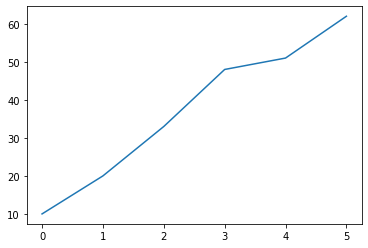

In [33]:
A['Amount'].plot()

<AxesSubplot:>

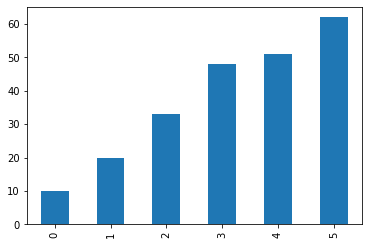

In [34]:
A['Amount'].plot(kind='bar')

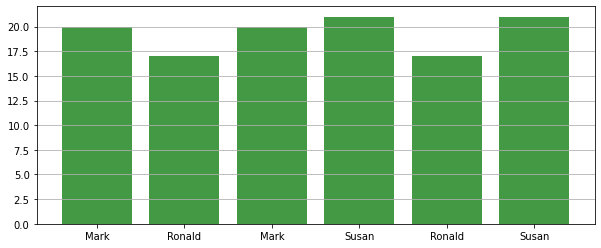

In [40]:
y = A['age'].values
x = np.arange(len(y))
plt.figure(figsize=(10, 4))
plt.bar(x, y, color='#449944')
plt.xticks(x, A['client'].values)
plt.grid(axis='y')

### MultiIndex

In [41]:
i1 = ['car', 'car', 'house', 'house', 'cottage', 'gold', 'wallet', 'wallet']
i2 = [1, 2, 1, 2, 1, 1, 1, 2]
index = pd.MultiIndex.from_tuples(list(zip(i1, i2)), names=['object', 'number'])

In [42]:
D = pd.DataFrame(np.random.rand(8, 2).round(2), index=index, columns=['amount1', 'amount2'])
D

amount1  amount2
object  number                  
car     1          0.86     0.45
        2          0.95     0.19
house   1          0.89     0.42
        2          0.33     0.75
cottage 1          0.00     0.15
gold    1          0.04     0.04
wallet  1          0.99     0.70
        2          0.55     0.26

In [43]:
D.unstack()

amount1       amount2      
number        1     2       1     2
object                             
car        0.86  0.95    0.45  0.19
cottage    0.00   NaN    0.15   NaN
gold       0.04   NaN    0.04   NaN
house      0.89  0.33    0.42  0.75
wallet     0.99  0.55    0.70  0.26

In [45]:
D.unstack().fillna(0).stack()

amount1  amount2
object  number                  
car     1          0.86     0.45
        2          0.95     0.19
cottage 1          0.00     0.15
        2          0.00     0.00
gold    1          0.04     0.04
        2          0.00     0.00
house   1          0.89     0.42
        2          0.33     0.75
wallet  1          0.99     0.70
        2          0.55     0.26

In [54]:
X = pd.DataFrame((np.random.rand(10, 4)*10).astype(int), columns=['a', 'b', 'c', 'd'])
X['a'] = np.arange(10)
X

,a,b,c,d
0,0,9,2,2
1,1,7,7,3
2,2,5,5,6
3,3,7,1,4
4,4,0,4,3
5,5,5,7,9
6,6,2,2,6
7,7,8,4,8
8,8,4,8,5
9,9,2,4,4


In [59]:
X.pivot(index='a', columns='b', values='c')

b,0,2,4,5,7,8,9
a,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,2.0
1,NaN,NaN,NaN,NaN,7.0,NaN,NaN
2,NaN,NaN,NaN,5.0,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,1.0,NaN,NaN
4,4.0,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,7.0,NaN,NaN,NaN
6,NaN,2.0,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,4.0,NaN
8,NaN,NaN,8.0,NaN,NaN,NaN,NaN


In [58]:
X.melt(id_vars=['a', 'b'])

,a,b,variable,value
0,0,9,c,2
1,1,7,c,7
2,2,5,c,5
3,3,7,c,1
4,4,0,c,4
5,5,5,c,7
6,6,2,c,2
7,7,8,c,4
8,8,4,c,8
9,9,2,c,4


## Categories

In [64]:
A['client'] = A['client'].astype('category')
A['client'].values.codes

array([0, 1, 0, 2, 1, 2], dtype=int8)

In [65]:
A['client'].value_counts()

Mark      2
Ronald    2
Susan     2
Name: client, dtype: int64

In [66]:
A.describe() # excluding categorical data

,Amount,normalized,Amount * 10,age
count,6.000000,6.000000,6.000000,6.000000
mean,37.333333,0.500000,373.333333,19.333333
std,19.876284,0.547723,198.762840,1.861899
min,10.000000,0.000000,100.000000,17.000000
25%,23.250000,0.000000,232.500000,17.750000
50%,40.500000,0.500000,405.000000,20.000000
75%,50.250000,1.000000,502.500000,20.750000
max,62.000000,1.000000,620.000000,21.000000


In [69]:
A['number'] = np.arange(6)
A

,Amount,client,normalized,Amount * 10,age,number
0,10,Mark,0.0,100,20,0
1,20,Ronald,0.0,200,17,1
2,33,Mark,1.0,330,20,2
3,48,Susan,0.0,480,21,3
4,51,Ronald,1.0,510,17,4
5,62,Susan,1.0,620,21,5


In [76]:
A['rel_number'] = A.groupby('client')['number'].apply(lambda x: np.argsort(x) + 1)
A

,Amount,client,normalized,Amount * 10,age,number,rel_number
0,10,Mark,0.0,100,20,0,1
1,20,Ronald,0.0,200,17,1,1
2,33,Mark,1.0,330,20,2,2
3,48,Susan,0.0,480,21,3,1
4,51,Ronald,1.0,510,17,4,2
5,62,Susan,1.0,620,21,5,2


In [79]:
from scipy.stats import rankdata
A['rel_number'] = A.groupby('client')['number'].transform(rankdata)
A

,Amount,client,normalized,Amount * 10,age,number,rel_number
0,10,Mark,0.0,100,20,0,1.0
1,20,Ronald,0.0,200,17,1,1.0
2,33,Mark,1.0,330,20,2,2.0
3,48,Susan,0.0,480,21,3,1.0
4,51,Ronald,1.0,510,17,4,2.0
5,62,Susan,1.0,620,21,5,2.0


In [82]:
A['transaction'] = A['client'].astype(str) + '-' + A['rel_number'].astype(str)
A

,Amount,client,normalized,Amount * 10,age,number,rel_number,transaction
0,10,Mark,0.0,100,20,0,1.0,Mark-1.0
1,20,Ronald,0.0,200,17,1,1.0,Ronald-1.0
2,33,Mark,1.0,330,20,2,2.0,Mark-2.0
3,48,Susan,0.0,480,21,3,1.0,Susan-1.0
4,51,Ronald,1.0,510,17,4,2.0,Ronald-2.0
5,62,Susan,1.0,620,21,5,2.0,Susan-2.0


In [83]:
A['transaction'].str.upper()

0      MARK-1.0
1    RONALD-1.0
2      MARK-2.0
3     SUSAN-1.0
4    RONALD-2.0
5     SUSAN-2.0
Name: transaction, dtype: object

### Dummies

In [85]:
pd.get_dummies(A['client'])

,Mark,Ronald,Susan
0,1,0,0
1,0,1,0
2,1,0,0
3,0,0,1
4,0,1,0
5,0,0,1


In [88]:
pd.get_dummies(A['client']).duplicated()

0    False
1    False
2     True
3    False
4     True
5     True
dtype: bool

## DateTime

In [91]:
F = pd.DataFrame({'a': [1, 2, 3, 4, 5], 't': ['1/2/2020', '12/31/2020', '3/22/2020', '7/16/2020', '4/28/2020']})
F

,a,t
0,1,1/2/2020
1,2,12/31/2020
2,3,3/22/2020
3,4,7/16/2020
4,5,4/28/2020


In [92]:
F.t = pd.to_datetime(F.t)
F

,a,t
0,1,2020-01-02
1,2,2020-12-31
2,3,2020-03-22
3,4,2020-07-16
4,5,2020-04-28


In [94]:
F.t.dt.day_of_week

0    3
1    3
2    6
3    3
4    1
Name: t, dtype: int64